

<div style="margin: 0 auto;
            max-width: 600px;">
    <div style="background-image: url('https://global.discourse-cdn.com/brave/original/3X/0/5/05ab24246ec26614fa27106953bbf7fcaa83ebae.gif');
                background-size: cover;
                padding: 50px;
                font-family: Verdana, sans-serif; /* Changed font family */
                border: 4px solid #fff;
                border-radius: 20px;
                color: #7469B6; /* Text color */
                text-align: center;
                box-shadow: 0px 8px 15px rgba(0, 0, 0, 0.4);
                animation: fadeIn 2s ease-in-out;">
        <h1 style="font-weight: bold; color: #fff;">Mastering Outlier Detection with the IQR Method</h1>
        <style>
            @keyframes fadeIn {
                from {
                    opacity: 0;
                }
                to {
                    opacity: 1;
                }
            }
            h1 {
                margin-top: 0;
                font-size: 48px;
                text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.6);
            }
        </style>
    </div>
</div>


<div style="box-shadow: 5px 5px 10px pink; border: 2px solid #D35400; border-radius: 10px; padding: 20px;">


<h3 style="color:#D35400; font-weight:bold;">ABOUT THE AUTHOR</h3>

I am <b>Zeeshan Younas</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in #KeepLearning and #KeepSupporting to keep growing and helping others in the field! 🌟.<br><br>

<img src="https://media.licdn.com/dms/image/D4D03AQG5iDKRRJFsCQ/profile-displayphoto-shrink_200_200/0/1714460771099?e=1720051200&v=beta&t=v8MfJW0-fdwbuOjHePjBMSdor0Nq5PhBhrpAtXhljlk" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%;"><br>
You can find more about me on my <a href="https://github.com/Zeeshan5932/project" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/zeeshan-younas-919a09253/" target="_blank">LinkedIn</a>.<br>
Feel free to connect and reach out for any collaboration or queries!

</div>




# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">IQR</p>

### Interquartile Range (IQR) Method

The Interquartile Range (IQR) method is a statistical technique used to identify outliers in a dataset. It measures the spread of the middle 50% of the data.


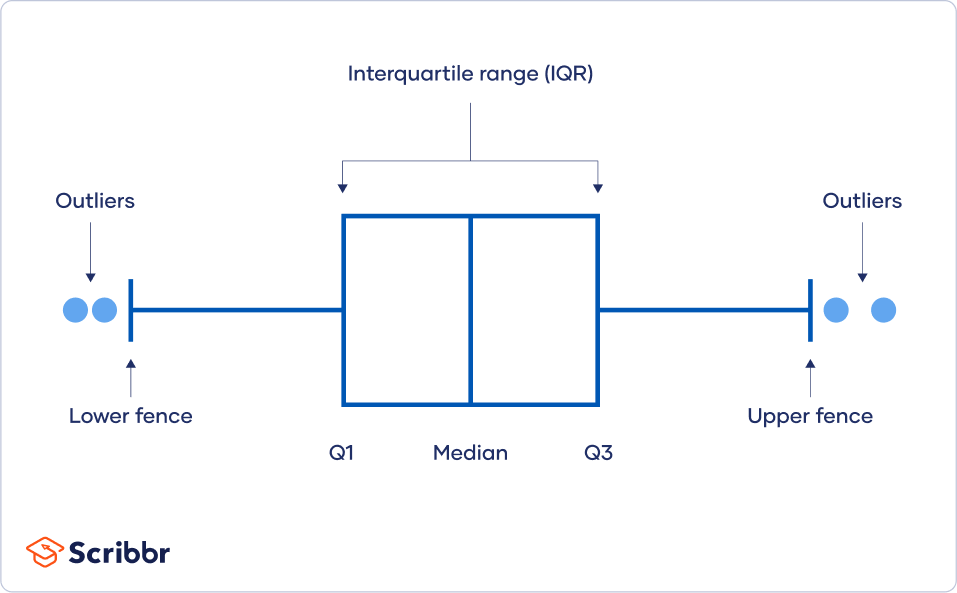

#### How to Calculate IQR

1. **Sort the data** in ascending order.
2. **Find the first quartile (Q1)**, which is the median of the first half of the data.
3. **Find the third quartile (Q3)**, which is the median of the second half of the data.
4. **Calculate IQR**: 
  
    $ \text{IQR} = Q3 - Q1 \ $

#### Identifying Outliers

1. **Determine the lower bound**: 
   
   $\text{Lower Bound} = Q1 - 1.5 \times \text{IQR} $
2. **Determine the upper bound**: 
   
   $ \text{Upper Bound} = Q3 + 1.5 \times \text{IQR} $
3. Any data points below the lower bound or above the upper bound are considered outliers.

#### Example

Let's say we have the following dataset of exam scores: 

$ [55, 60, 65, 70, 75, 80, 85, 90, 95, 100] $

1. **Sort the data** (already sorted).
2. **Find Q1**: The median of the first half $((55, 60, 65, 70, 75))$ is 65.
3. **Find Q3**: The median of the second half \((80, 85, 90, 95, 100)\) is 90.
4. **Calculate IQR**: 
 
   $ \text{IQR} = 90 - 65 = 25 $
5. **Determine the lower bound**: 
 
   $ 65 - 1.5 \times 25 = 65 - 37.5 = 27.5 $
6. **Determine the upper bound**: 
   
   $ 90 + 1.5 \times 25 = 90 + 37.5 = 127.5 $

Since all the data points lie within the range of 27.5 to 127.5, there are no outliers in this dataset.

### Why We Use IQR Method

1. **Robustness**: The IQR method is less affected by extreme values or non-normal distributions compared to other methods like the mean and standard deviation.
2. **Simplicity**: It's straightforward to calculate and interpret.
3. **Effective for small datasets**: Works well even with small sample sizes where other methods might fail to accurately identify outliers.





# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Importing libraries</p>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


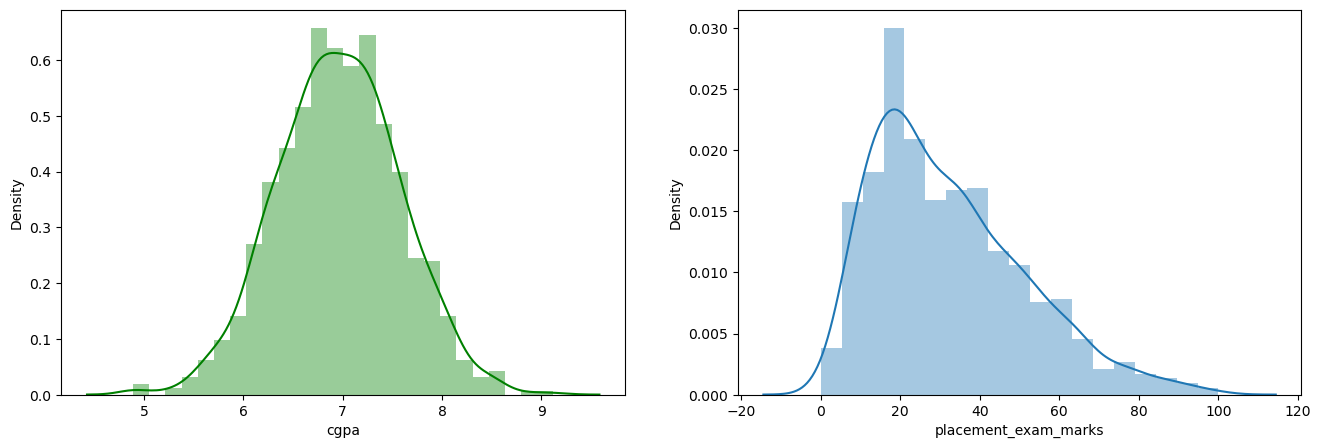

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],color='g')

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot: >

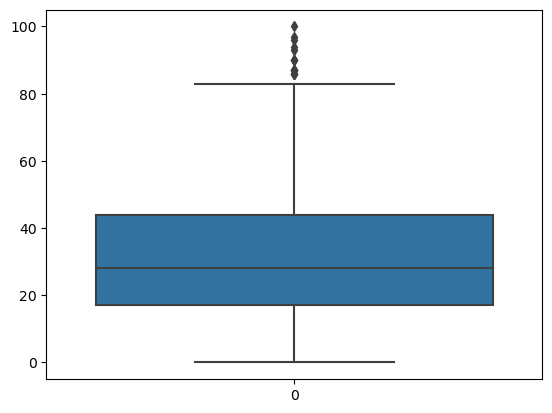

In [11]:
sns.boxplot(df['placement_exam_marks'])

>The upper bound indicates the presence of outliers, which I can remove using two techniques
- Trimming 
- Capping

In [12]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [13]:
percentile75

44.0

In [15]:
percentile25

17.0

iqr = percentile75 - percentile25

    = 44 - 17
    
  iqr  = 27 

In [16]:
iqr = percentile75 - percentile25

In [17]:
iqr

27.0

These formulas are used to identify outliers in a dataset:

- **Upper limit:** `upper_limit = percentile75 + 1.5 * IQR`
- **Lower limit:** `lower_limit = percentile25 - 1.5 * IQR`

Values that fall above the upper limit or below the lower limit are considered outliers. This method is based on the interquartile range (IQR), which measures the spread of the middle 50% of the data.

In [18]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [19]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5





# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Finding Outliers</p>


In [20]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [21]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed





# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Trimming</p>




If you want to learn about trimming and capping, go and check this [Notebook](https://www.kaggle.com/code/zeeshanyounas001/guide-of-outliers-z-score-method)

In [22]:
new = df[df['placement_exam_marks'] < upper_limit]

**In which I need only rows where` placement_exam_marks` are less than the upper limit.**

In [24]:
new.shape

(985, 3)

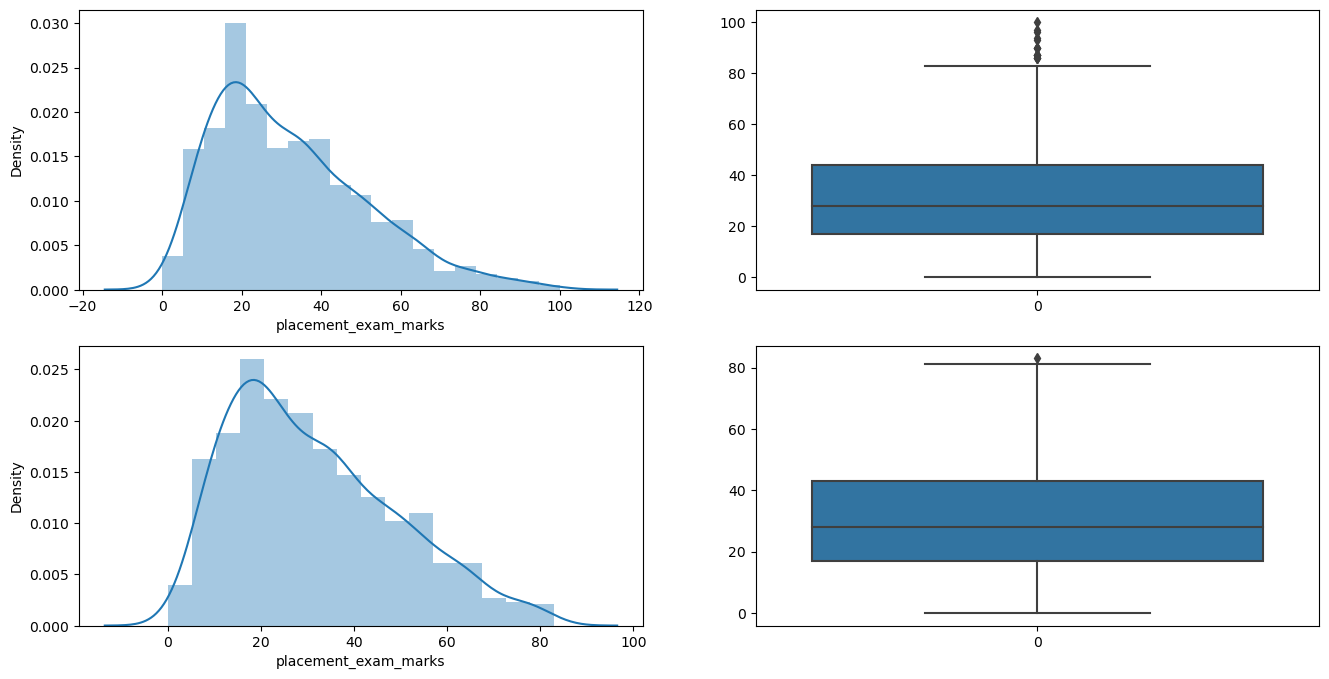

In [26]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new['placement_exam_marks'])

plt.show()






# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#f20c0f;">Capping</p>




In [27]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [29]:
new_df_cap.shape

(1000, 3)

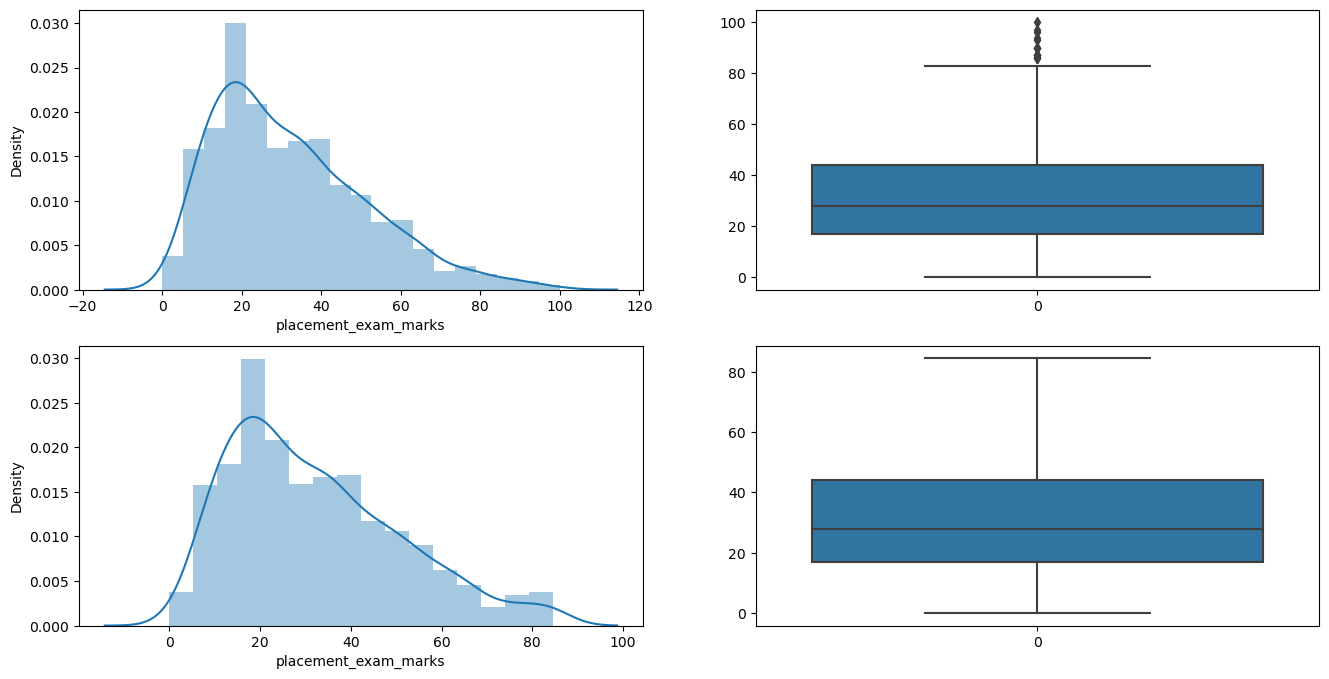

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()



# <span style="color: yellow; text-shadow: 3px 3px 6px black; font-family:  Verdana; font-weight: bold;">If you have any questions, please feel free to reach out.</span>